In [1]:
import csv
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
# import requests
# import geopandas
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np

url = "https://github.com/phamkdaniel/Cali-Housing-Project/blob/master/Resources/complete_housing_data.csv"


In [2]:
def scatter(ser1, ser2):
    clrs = ['#4477aa', '#66ccee', '#228833', '#ccbb44', '#ee6677', '#aa3377', '#bbbbbb']

    index = np.random.randint(7)

    fig, ax = plt.subplots(figsize=(10,10))

    ax.scatter(ser1, ser2, color=clrs[index], edgecolor='k')

    ax.set_title(f"{ser1.name} vs. {ser2.name}")
    ax.set_xlabel(ser1.name)
    ax.set_ylabel(ser2.name)

    plt.show()


def detect_outlier(data_1):
    outliers=[]

    threshold=10
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers


In [3]:

# import csv
housing_df = pd.read_csv("Resources/complete_housing_data.csv")
housing_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county_name,total_crime_rate
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Contra Costa,4.776461
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Contra Costa,4.776461
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda,6.625693
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda,6.625693
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda,6.625693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20605,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,Yuba,5.778337
20606,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,Yuba,5.778337
20607,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,Yuba,5.778337
20608,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,Yuba,5.778337


In [57]:
#Obtaining maximum values for each column

housing_df.county_name.nunique()

58

In [5]:
#Creating Variables for all columns
longitude = housing_df["longitude"]
latitude = housing_df["latitude"]
housing_median_age = housing_df["housing_median_age"]
total_rooms = housing_df["total_rooms"]
total_bedrooms = housing_df["total_bedrooms"]
population = housing_df["population"]
households = housing_df["households"]
median_income = housing_df["median_income"]
median_house_value = housing_df["median_house_value"]
ocean_proximity = housing_df["ocean_proximity"]
county_name = housing_df["county_name"]
total_crime_rate = housing_df["total_crime_rate"]


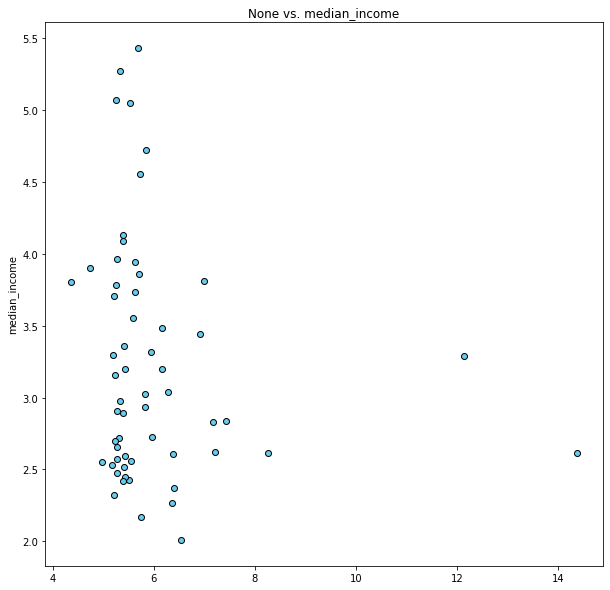

In [61]:
total_county_rooms = housing_df.groupby("county_name")["total_rooms"].sum()
total_county_households = housing_df.groupby("county_name")["households"].sum()
total_bedrooms_county = housing_df.groupby("county_name")["total_bedrooms"].sum()
total_rooms_per_household = total_county_rooms / total_county_households
total_bedrooms_perhousehold = total_bedrooms_county / total_county_households
county_median_income = housing_df.groupby("county_name")["median_income"].mean()
county_house_value = housing_df.groupby("county_name")["median_house_value"].mean()
county_crime_rate = housing_df.groupby("county_name")["total_crime_rate"].mean()
county_population = housing_df.groupby("county_name")["population"].sum()
county_avg_age = housing_df.groupby("county_name")["housing_median_age"].mean()


scatter(total_rooms_per_household, county_median_income)


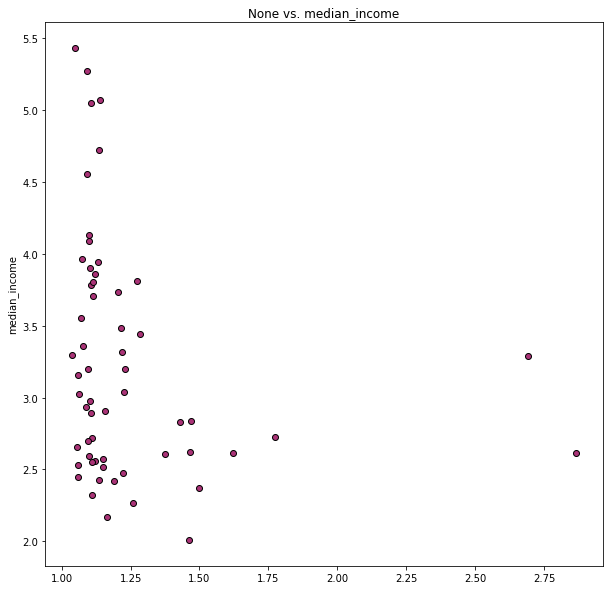

In [62]:
scatter(total_bedrooms_perhousehold, county_median_income)



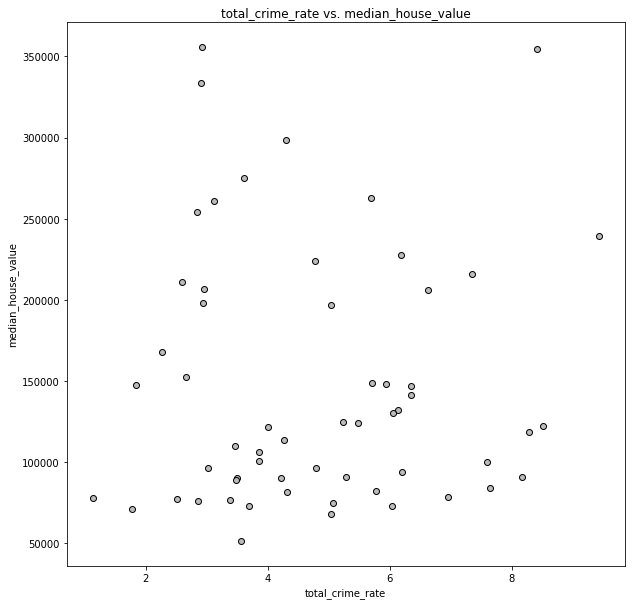

In [63]:
scatter(county_crime_rate, county_house_value)


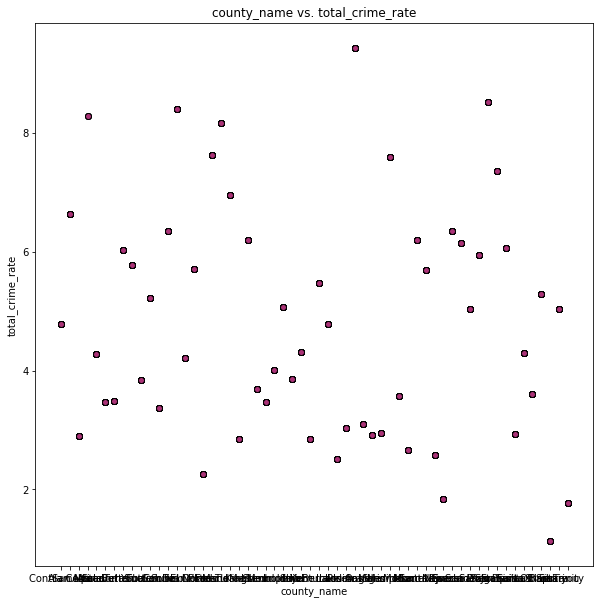

In [9]:
scatter(county_name, total_crime_rate)


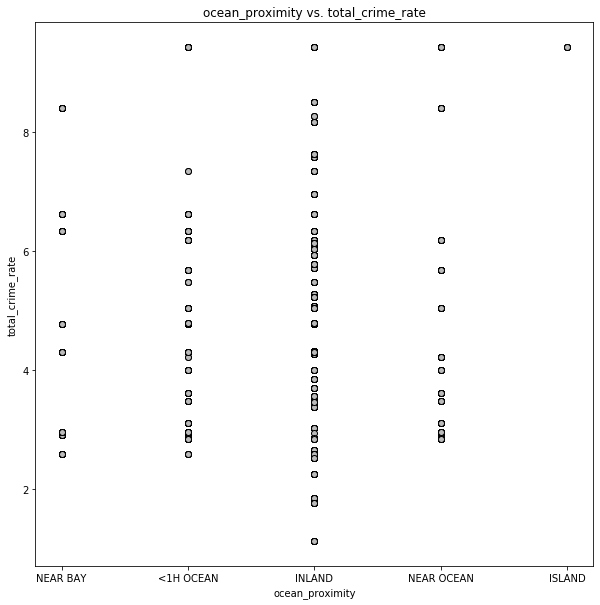

In [65]:
scatter(ocean_proximity, total_crime_rate)


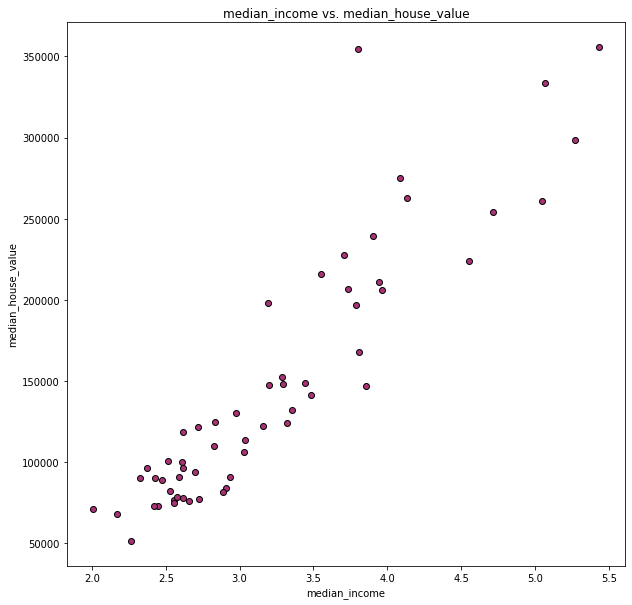

In [69]:
scatter(county_median_income, county_house_value)


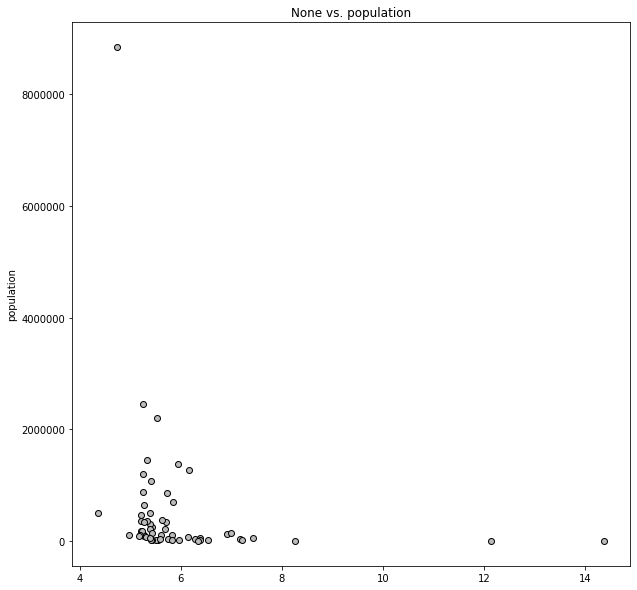

In [70]:
scatter(total_rooms_per_household, county_population)


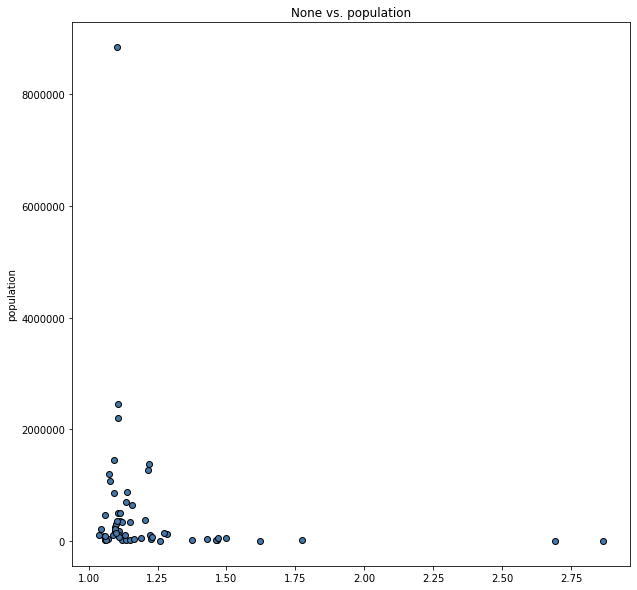

In [71]:
scatter(total_bedrooms_perhousehold, county_population)


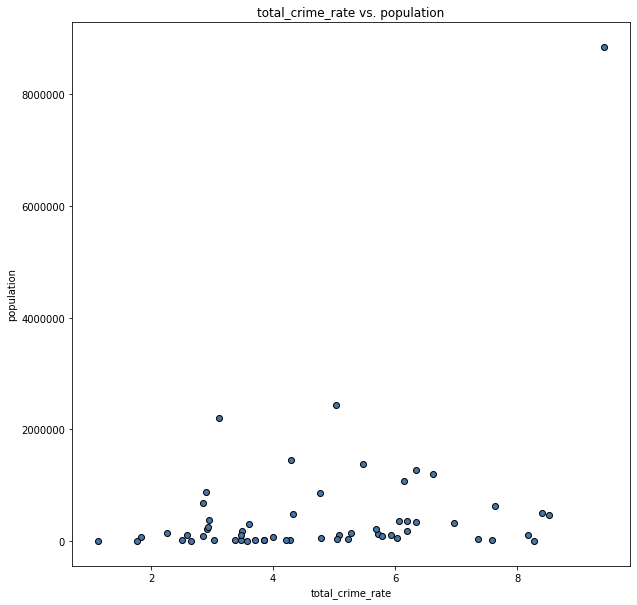

In [72]:
scatter(county_crime_rate, county_population)

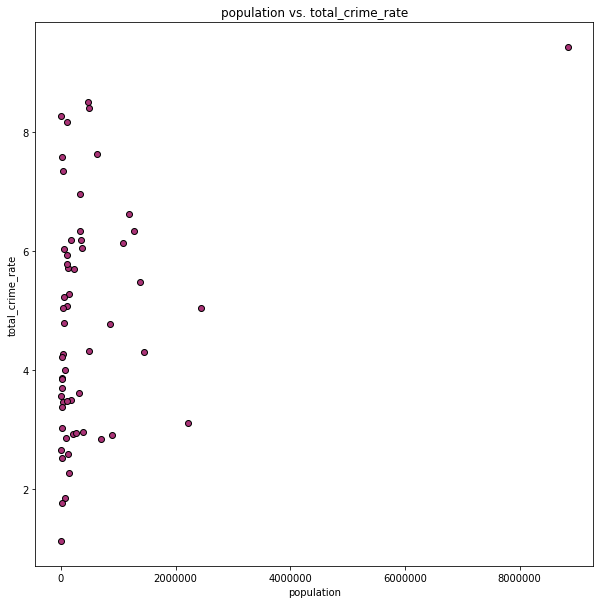

In [73]:
scatter(county_population, county_crime_rate)

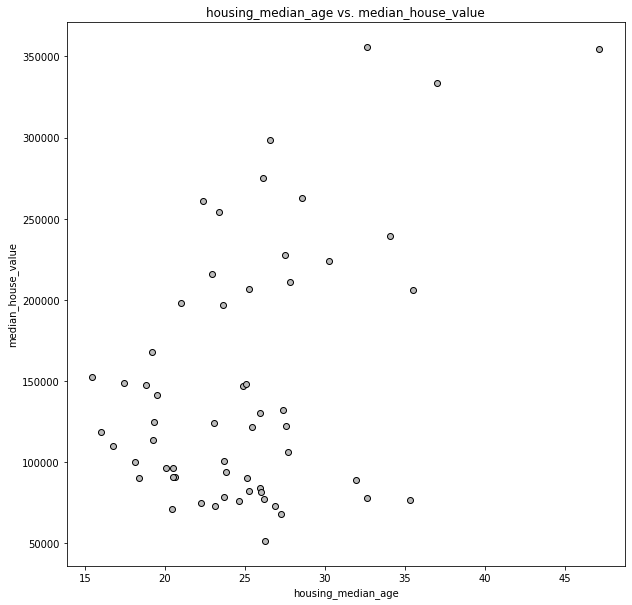

In [74]:
scatter(county_avg_age, county_house_value)

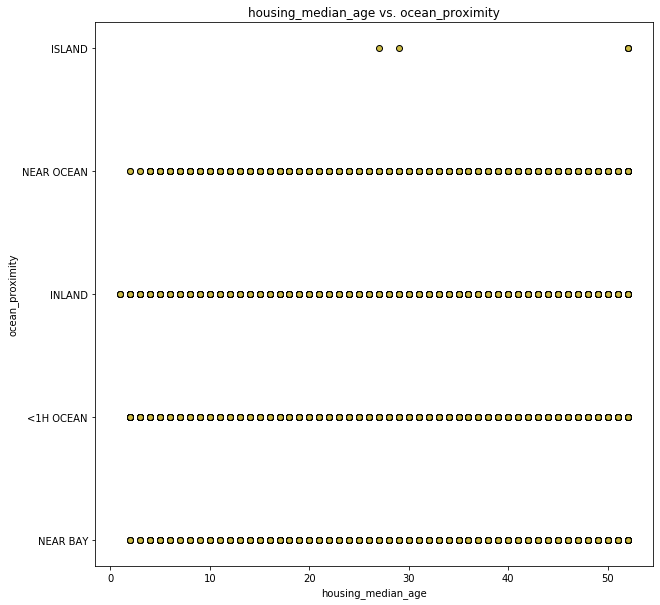

In [18]:
scatter(housing_median_age, ocean_proximity)

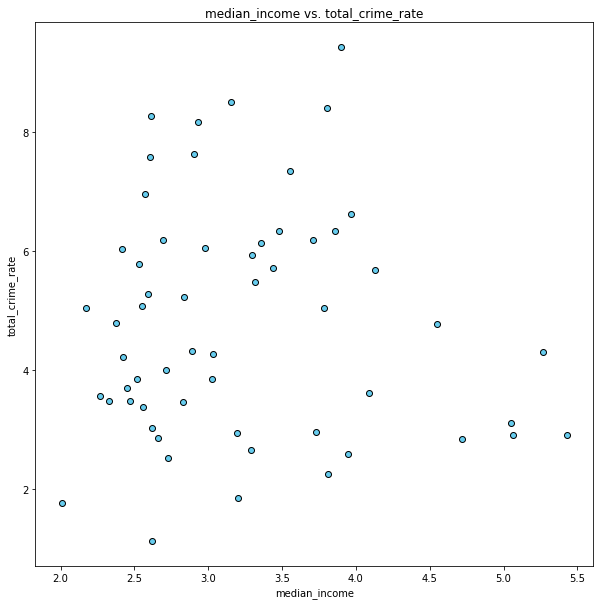

In [75]:
scatter(county_median_income, county_crime_rate)

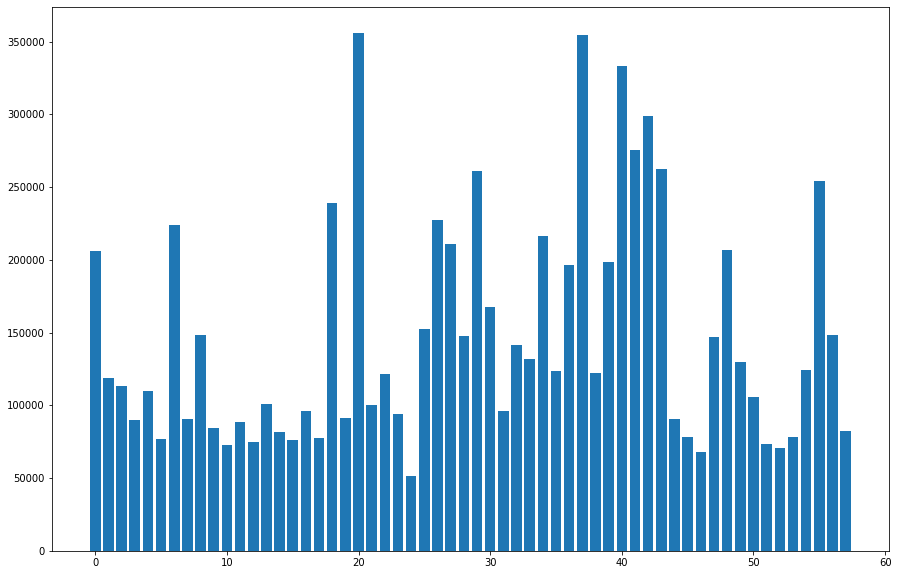

In [80]:
x = np.arange(0, len(county_house_value), step=1)

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(x, county_house_value)

plt.show()


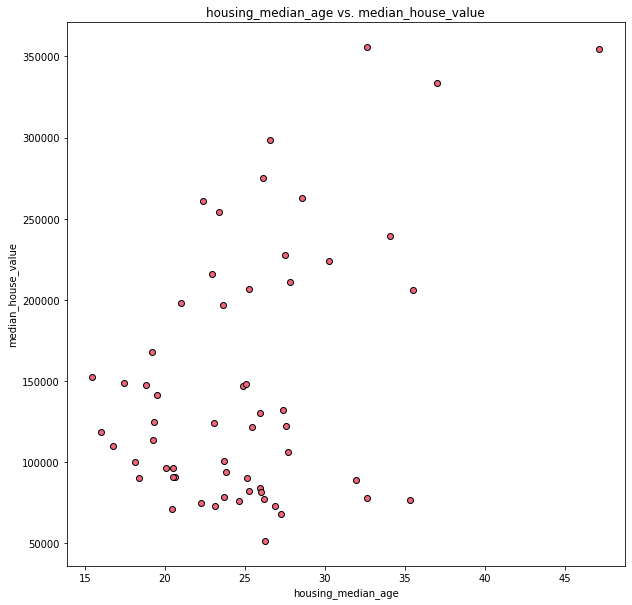

In [81]:
scatter(county_avg_age, county_house_value)


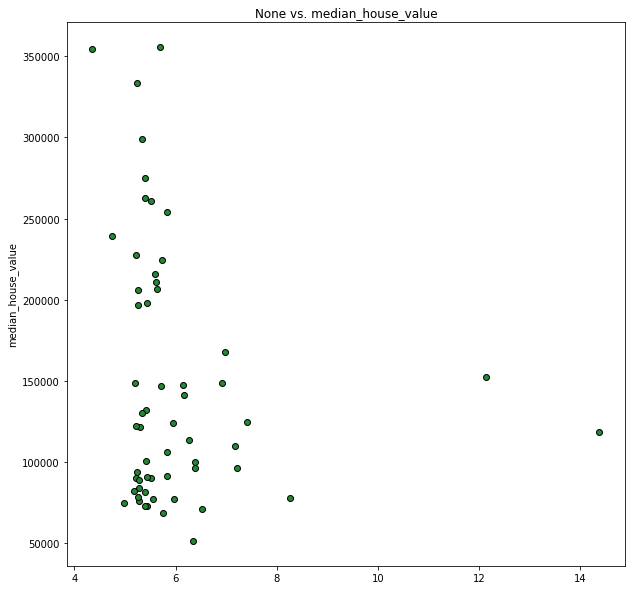

In [82]:
scatter(total_rooms_per_household, county_house_value)


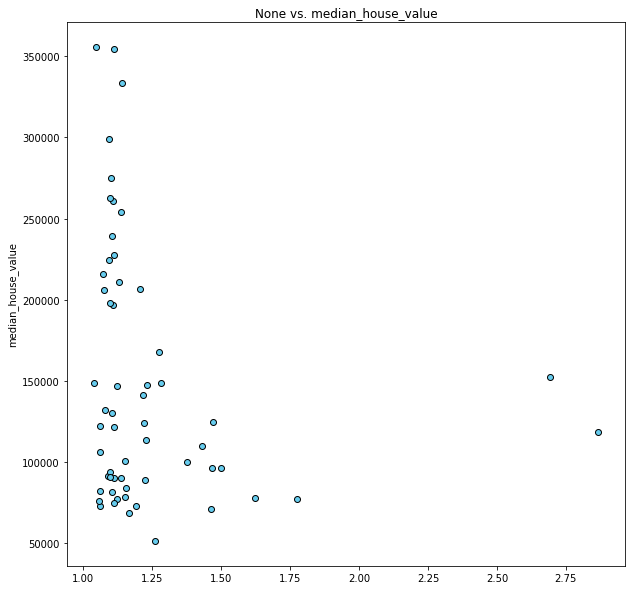

In [83]:
scatter(total_bedrooms_perhousehold, county_house_value)


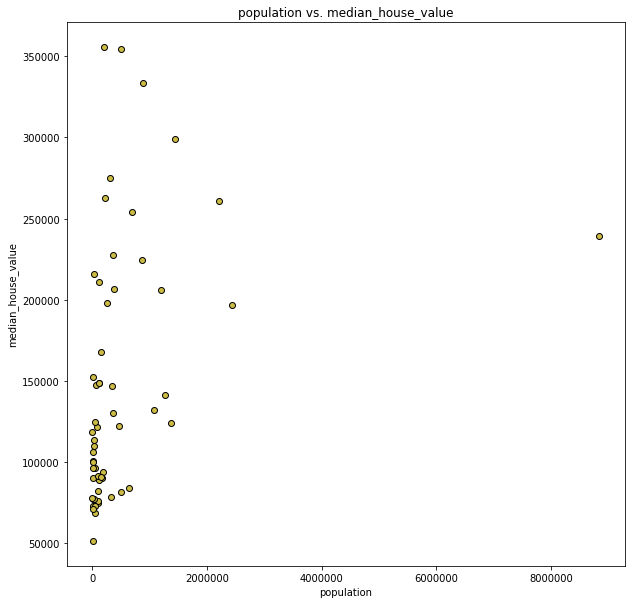

In [84]:
scatter(county_population, county_house_value)


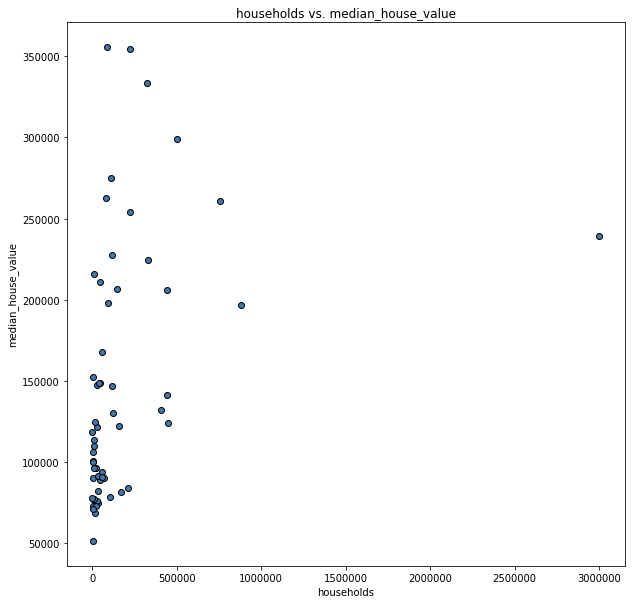

In [85]:
scatter(total_county_households, county_house_value)


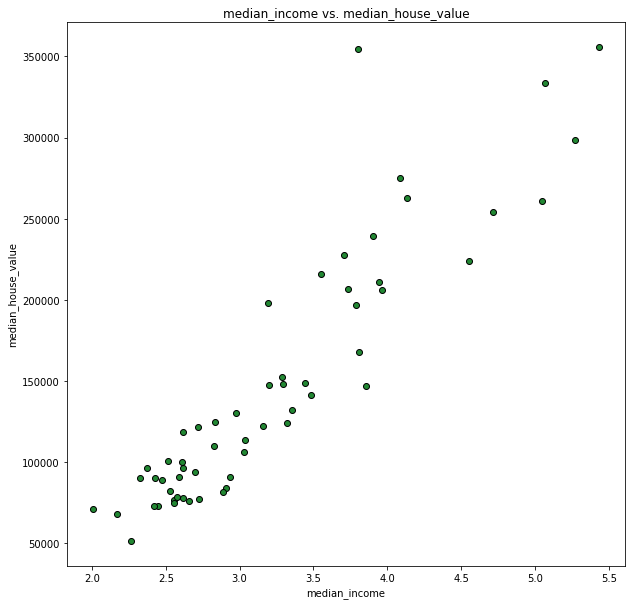

In [86]:
scatter(county_median_income, county_house_value)


In [27]:
outlier_datapoints = detect_outlier(median_income)
print(outlier_datapoints)


[]


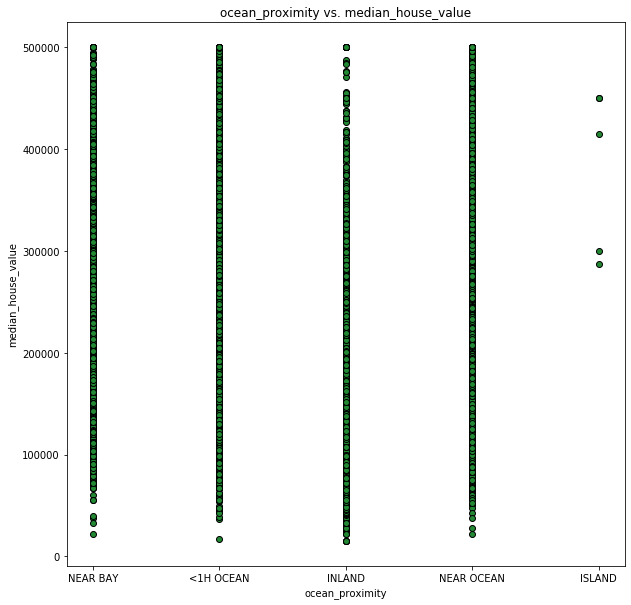

In [28]:
scatter(ocean_proximity, median_house_value)



In [87]:
#scatter(county_name, median_house_value)


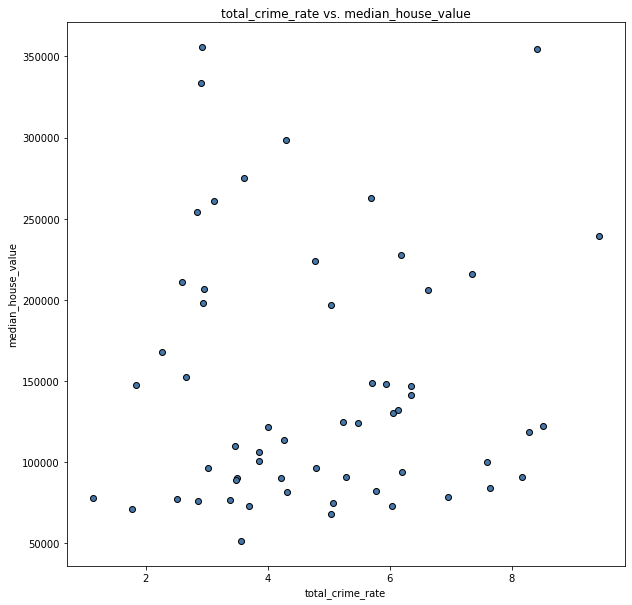

In [88]:
scatter(county_crime_rate, county_house_value)


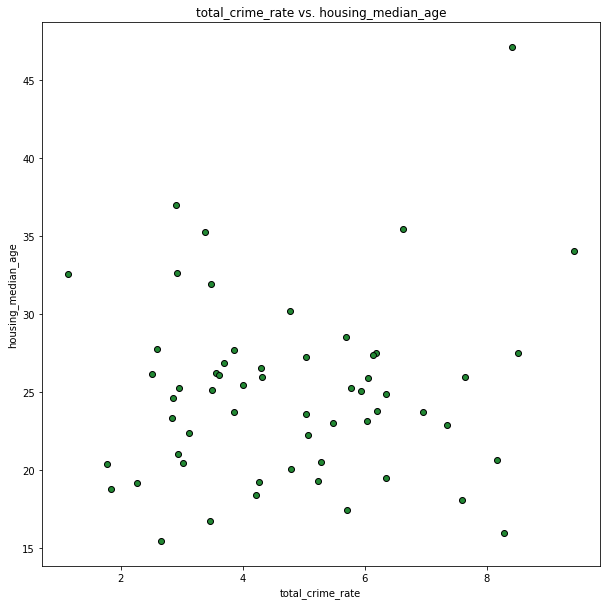

In [89]:
#New set of graphs
scatter(county_crime_rate, county_avg_age)



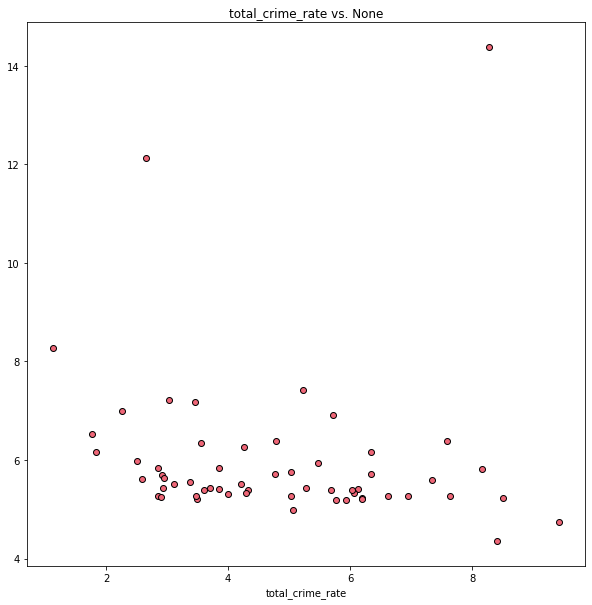

In [90]:
scatter(county_crime_rate, total_rooms_per_household)



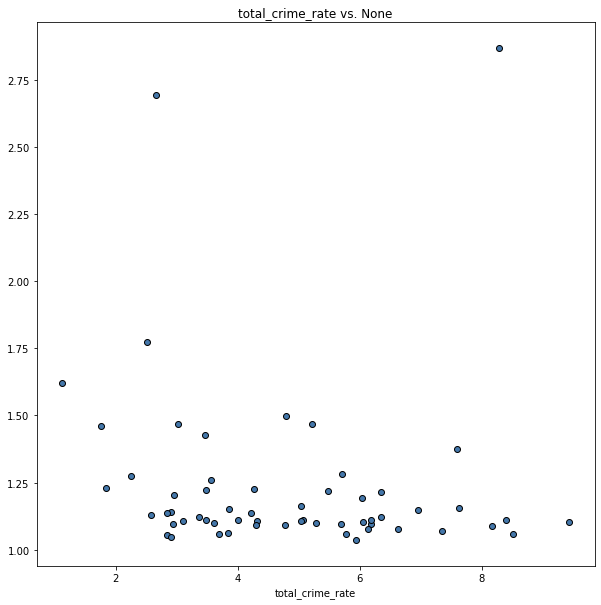

In [91]:
scatter(county_crime_rate, total_bedrooms_perhousehold)


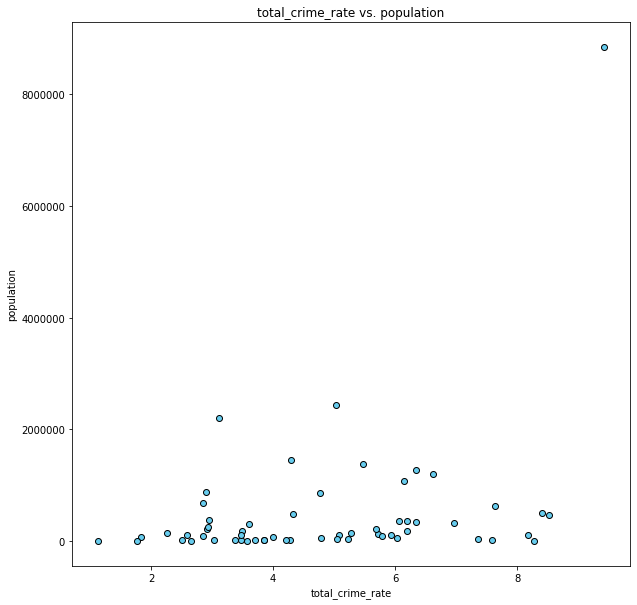

In [92]:
scatter(county_crime_rate, county_population)


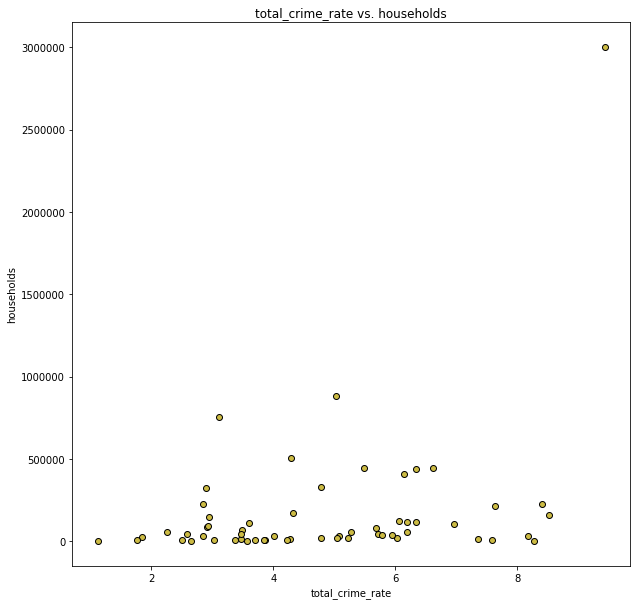

In [93]:
scatter(county_crime_rate, total_county_households)


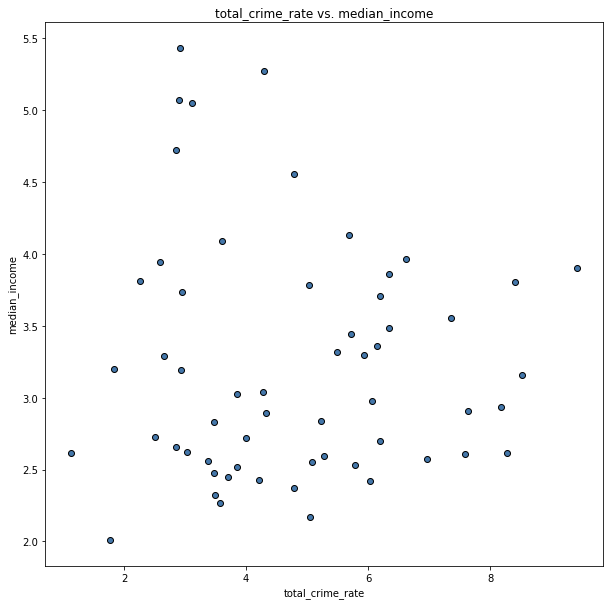

In [94]:
scatter(county_crime_rate, county_median_income)


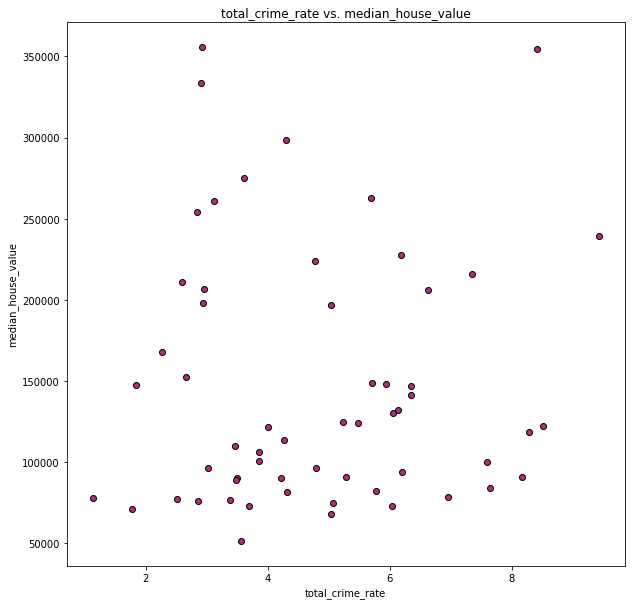

In [95]:
scatter(county_crime_rate, county_house_value)


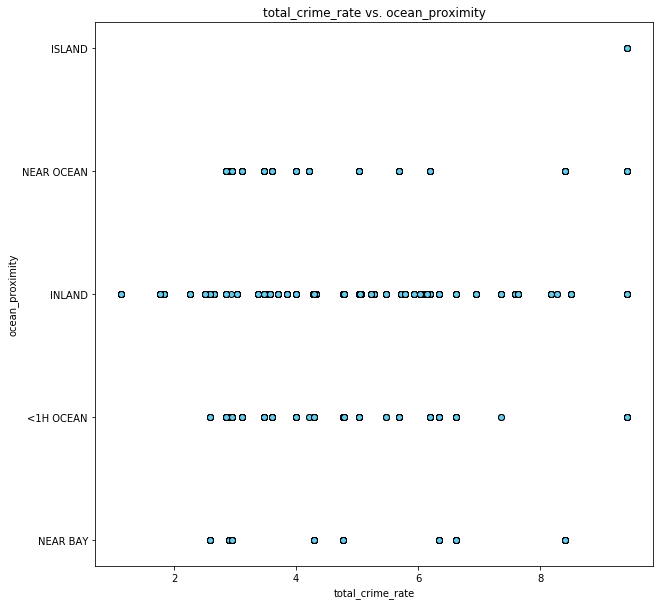

In [38]:
scatter(total_crime_rate, ocean_proximity)


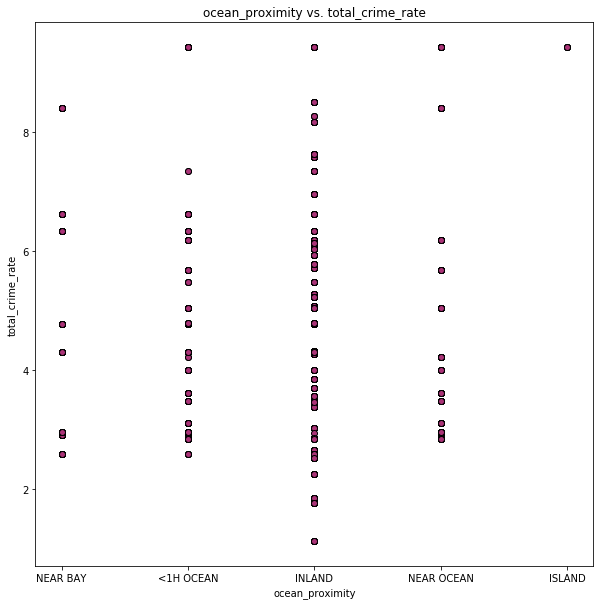

In [39]:
scatter(ocean_proximity, total_crime_rate)


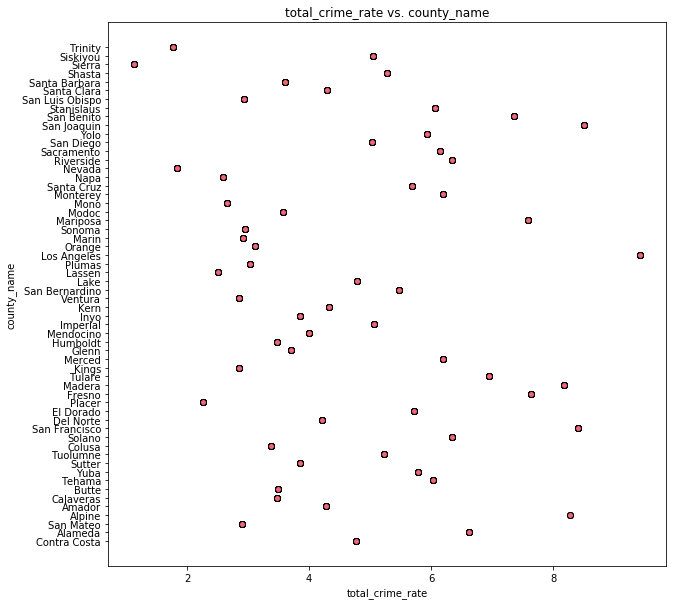

In [40]:
scatter(total_crime_rate, county_name)


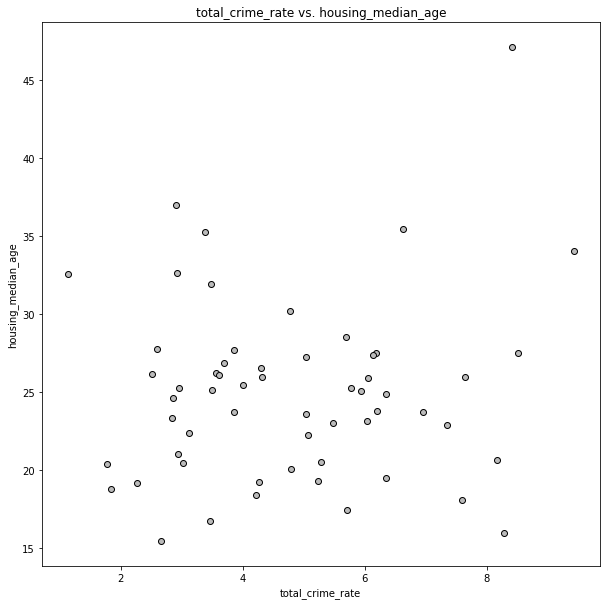

In [96]:
scatter(county_crime_rate, county_avg_age)
